In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

## 2024 데이터 전처리

In [6]:
df = pd.read_excel('data/2024/2024 외래관광객조사_Data.xlsx')

In [7]:
df

,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,Q2a1,...,D_SEX,D_AGE,D_MOK,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight
0,57,5,4,5.0,1,1,7.0,NaN,NaN,NaN,...,2,5,1,4,1,198.017146,NaN,NaN,NaN,198.017146
1,58,4,4,5.0,1,1,7.0,10.0,2.0,1.0,...,2,4,1,4,1,784.278401,NaN,NaN,NaN,784.278401
2,59,3,3,5.0,1,1,7.0,2.0,8.0,1.0,...,2,3,1,3,1,607.021269,NaN,NaN,NaN,607.021269
3,60,1,1,NaN,1,1,8.0,7.0,3.0,NaN,...,1,2,1,1,1,1049.500143,NaN,NaN,NaN,1049.500143
4,61,5,4,5.0,1,1,2.0,9.0,10.0,4.0,...,2,2,1,4,1,876.796936,NaN,NaN,NaN,876.796936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,19273,2,2,5.0,1,1,5.0,4.0,7.0,1.0,...,2,4,1,2,1,NaN,NaN,NaN,1215.218286,1215.218286
16212,19274,2,2,5.0,1,1,9.0,2.0,7.0,5.0,...,1,4,1,2,1,NaN,NaN,NaN,1131.834751,1131.834751
16213,19275,1,1,NaN,1,1,5.0,7.0,NaN,NaN,...,2,5,1,1,1,NaN,NaN,NaN,1212.382353,1212.382353
16214,19277,2,2,5.0,1,1,2.0,4.0,6.0,NaN,...,1,5,1,2,1,NaN,NaN,NaN,1287.852779,1287.852779


- 국적: D_NAT
- 체류기간: M일HAP
- 동반자 유무: Q7A
- 동행자 유형: Q7a_dk ~ Q7a8
- 여행 형태: D_GUB
- 방문 목적: D_MOK
- 총지출: 총액1인TOT_개별국제교통비제외2
- 여가·체험 관련 지출 항목: C문화서1인대체, C오락및1인대체, C미용서1인대체
- 가중치: weight 

In [32]:
cols_needed = ['D_NAT', 'M일HAP', 
               'Q7A','Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8',
               'D_GUB', 'D_MOK', '총액1인TOT_개별국제교통비제외2', 
               'C문화서1인대체', 'C오락및1인대체', 'C미용서1인대체', 'weight']
df = df[cols_needed]

In [33]:
df

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,D_GUB,D_MOK,총액1인TOT_개별국제교통비제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight
1,3,5,2,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,1,1,846.372229,2,1,1,784.278401
2,3,6,2,NaN,NaN,NaN,4.0,NaN,NaN,7.0,NaN,1,1,742.948932,1,3,1,607.021269
3,1,6,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,727.256097,1,1,1,1049.500143
4,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,1,1259.775985,1,1,1,876.796936
5,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1,1,1024.281211,1,1,1,829.975293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,425.630000,1,1,1,1215.218286
16212,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,140.732500,1,1,1,1131.834751
16213,1,5,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1,1,2553.938220,1,1,4,1212.382353
16214,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,617.850000,1,1,1,1287.852779


In [10]:
df.isnull().sum()

D_NAT                     0
M일HAP                     0
Q7A                       0
Q7a_dk                11275
Q7a2                  12905
Q7a3                  15081
Q7a4                  14707
Q7a5                  14518
Q7a6                  11961
Q7a7                  14520
Q7a8                  16108
D_GUB                     0
D_MOK                     0
총액1인TOT_개별국제교통비제외2        0
C문화서1인대체                  0
C오락및1인대체                  0
C미용서1인대체                  0
weight                    0
dtype: int64

In [34]:
df['C문화서1인대체'].value_counts()

C문화서1인대체
1    6448
2    1085
3     575
4     334
Name: count, dtype: int64

In [35]:
df['C미용서1인대체'].value_counts()

C미용서1인대체
1    7539
4     506
3     316
2      81
Name: count, dtype: int64

In [36]:
df['C오락및1인대체'].value_counts()

C오락및1인대체
1    7626
3     497
2     174
4     145
Name: count, dtype: int64

### 동행자 유형 분류

In [11]:
# 1. 동행자 관련 컬럼만 추출
companion_cols = ['Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8']

# 2. 결측치 처리 안함 
# 결측치는 <선택하지 않음>을 의미하므로 처리하지 않음

# 3. 동행자유형 파생 변수 만들기
def classify_companion(row):
    # 혼자 온 경우
    if row['Q7a_dk'] == 1:
        return '혼자'

    # 가족 유형
    if any([
        row['Q7a2'] == 2,
        row['Q7a3'] == 3,
        row['Q7a4'] == 4,
        row['Q7a5'] == 5
    ]):
        return '가족'

    # 친구
    if row['Q7a6'] == 6:
        return '친구'

    # 직장동료
    if row['Q7a7'] == 7:
        return '직장동료'

    # 기타
    if row['Q7a8'] == 8:
        return '기타'

    # 아무 것도 선택하지 않은 경우
    return '응답없음'

# 4. 적용
df['동행자유형'] = df.apply(classify_companion, axis=1)

# 5. 유효 응답만 남기기
df = df[df['동행자유형'] != '응답없음'].copy()


C:\Users\82106\AppData\Local\Temp\ipykernel_13800\3636205612.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['동행자유형'] = df.apply(classify_companion, axis=1)


In [12]:
df.columns

Index(['D_NAT', 'M일HAP', 'Q7A', 'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5',
       'Q7a6', 'Q7a7', 'Q7a8', 'D_GUB', 'D_MOK', '총액1인TOT_개별국제교통비제외2',
       'C문화서1인대체', 'C오락및1인대체', 'C미용서1인대체', 'weight', '동행자유형'],
      dtype='object')

In [13]:
df['동행자유형'].value_counts()

동행자유형
가족      5775
혼자      4941
친구      3902
직장동료    1530
기타        68
Name: count, dtype: int64

### 국적 선별 
- 2023년 글로벌 방한 관광객 통계 기준 상위 6개국 
- GWI-Rankings 상위 5개국 중 2개국(방한관광객 상위 국가와 중복 제외)

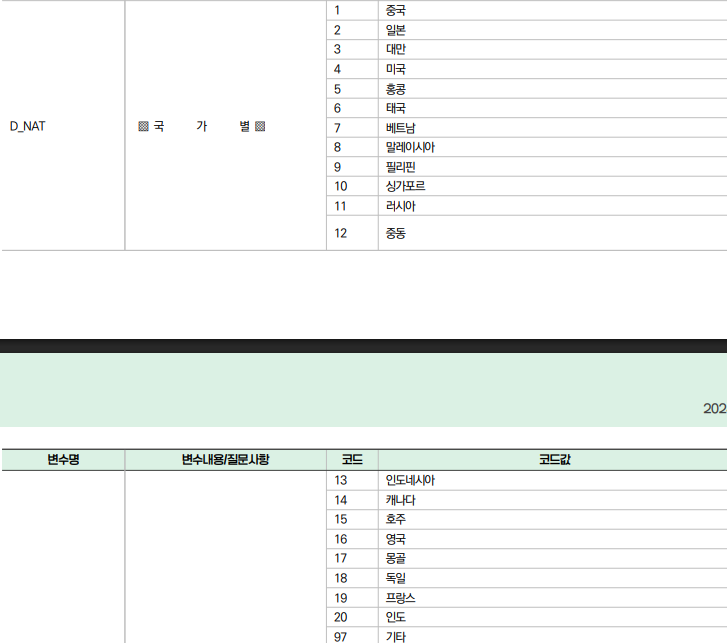

In [14]:
df['D_NAT'].value_counts()

D_NAT
1     2215
2     2007
3     1300
4     1192
5      834
7      769
10     687
6      648
12     644
9      621
97     607
8      606
13     536
14     536
15     530
19     451
11     425
18     423
17     419
16     419
20     347
Name: count, dtype: int64

### 국가명 매핑

In [15]:
df['D_NAT'].dtype

dtype('int64')

In [16]:
nat_map = {
    1: '중국',
    2: '일본',
    3: '대만',
    4: '미국',
    5: '홍콩',
    6: '태국',
    7: '베트남',
    10: '싱가포르',
    16: '영국',
    18: '독일'
}

df['국가명'] = df['D_NAT'].map(nat_map)

# 분석 대상 국가만 필터링
df = df[df['국가명'].notna()]

In [17]:
df['국가명'].value_counts()

국가명
중국      2215
일본      2007
대만      1300
미국      1192
홍콩       834
베트남      769
싱가포르     687
태국       648
독일       423
영국       419
Name: count, dtype: int64

### 여가·체험 지출 비율 변수 만들기
- 여가체험비율 = (C문화서1인대체 + C미용서1인대체 + C오락및1인대체) / 총지출
- 총액1인TOT2가 0인 경우 → 0으로 나누는 오류 발생 가능 → 제외 필요
- 결측치는 없지만 분모가 0인 경우를 먼저 제거

In [18]:
df['C문화서1인대체'].isnull().sum()
df['C미용서1인대체'].isnull().sum()
df['C오락및1인대체'].isnull().sum()

np.int64(0)

In [19]:
# 총지출이 0 초과인 응답만 필터링
df = df[df['총액1인TOT_개별국제교통비제외2'] > 0]

In [20]:
# 여가체험비율 계산
df['여가체험비율'] = (
    df['C문화서1인대체'] + df['C미용서1인대체'] + df['C오락및1인대체']
) / df['총액1인TOT_개별국제교통비제외2']

In [21]:
df['여가체험비율'].head(15)

1     0.004726
2     0.006730
3     0.004125
4     0.002381
5     0.002929
6     0.003412
7     0.001781
8     0.003002
10    0.005506
12    0.001382
13    0.002211
15    0.002902
16    0.001386
17    0.001386
18    0.003096
Name: 여가체험비율, dtype: float64

### 여행 목적 컬럼 (D_MOK) 전처리
- 여가/위락/힐링, 친구/친지 방문, 사업/전문 활동, 교육, 기타
- 여가/힐링을 즐길 의사와 여건이 있었던 응답자만 포함

In [22]:
df['D_MOK'].dtype

dtype('int64')

In [23]:
df = df[df['D_MOK'].isin([1, 2])]

In [24]:
df

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,D_GUB,D_MOK,총액1인TOT_개별국제교통비제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight,동행자유형,국가명,여가체험비율
1,3,5,2,NaN,2.0,NaN,4.0,NaN,NaN,NaN,...,1,1,846.372229,2,1,1,784.278401,가족,대만,0.004726
2,3,6,2,NaN,NaN,NaN,4.0,NaN,NaN,7.0,...,1,1,742.948932,1,3,1,607.021269,가족,대만,0.006730
3,1,6,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,727.256097,1,1,1,1049.500143,혼자,중국,0.004125
4,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1,1,1259.775985,1,1,1,876.796936,가족,대만,0.002381
5,3,5,2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,1,1,1024.281211,1,1,1,829.975293,가족,대만,0.002929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,425.630000,1,1,1,1215.218286,친구,중국,0.007048
16212,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,1,1,140.732500,1,1,1,1131.834751,가족,중국,0.021317
16213,1,5,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,1,1,2553.938220,1,1,4,1212.382353,가족,중국,0.002349
16214,1,5,2,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,1,1,617.850000,1,1,1,1287.852779,가족,중국,0.004856


### 이상치 확인

총액1인TOT_개별국제교통비제외2가 0 이하인 경우 수: 0
count    8442.000000
mean     1286.574938
std      1117.725836
min       139.800000
25%       671.938540
50%       969.000000
75%      1481.200000
max      8185.600000
Name: 총액1인TOT_개별국제교통비제외2, dtype: float64


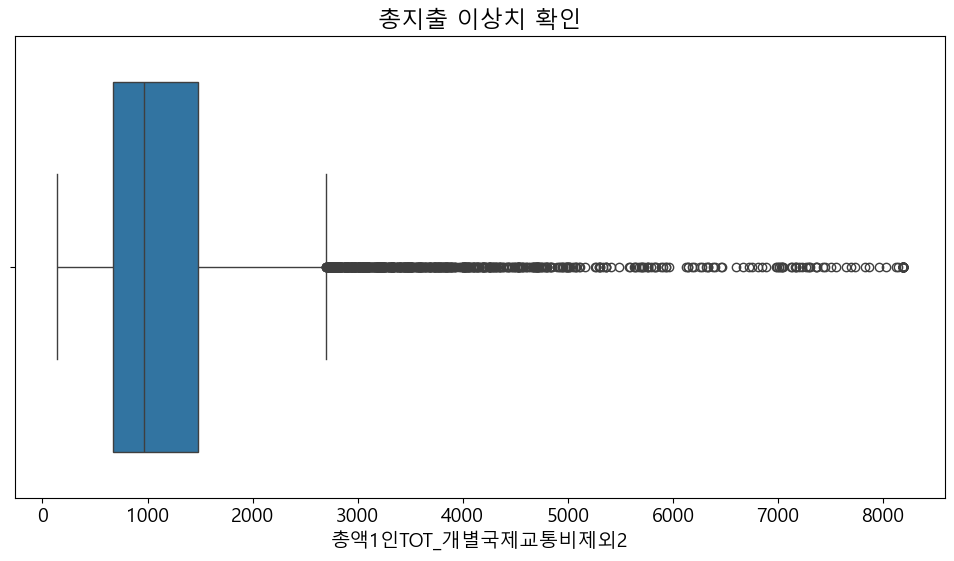

In [25]:
# 총액1인TOT_개별국제교통비제외2 (총 지출): 0, 음수, 이상치 확인
# 총지출 0 또는 음수 확인
print("총액1인TOT_개별국제교통비제외2가 0 이하인 경우 수:", (df['총액1인TOT_개별국제교통비제외2'] <= 0).sum())

# 이상치 탐지용 기초 통계
print(df['총액1인TOT_개별국제교통비제외2'].describe())

# boxplot 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['총액1인TOT_개별국제교통비제외2'])
plt.title("총지출 이상치 확인")
plt.show()

- 여가·체험 지출 비율 중심 분석이므로 절댓값 이상치는 직접 영향 없음
- 고지출자는 웰니스 콘텐츠 주요 타겟일 가능성도 있음	
- 응답 수 적은 국가나 유형에서 이상치 제거 시 왜곡 우려

- ANOVA 검정 안정 확보를 위해 로그 변환 변수 추가

In [26]:
df['log_총액'] = np.log(df['총액1인TOT_개별국제교통비제외2'])

여가체험비율 ≤ 0: 0
여가체험비율 ≥ 1: 0


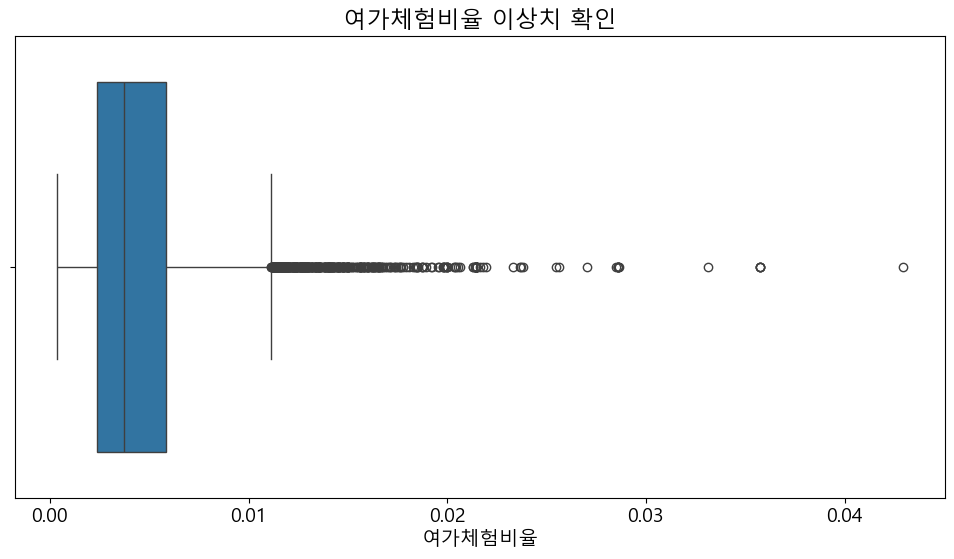

In [27]:
# 여가체험비율: 0 이하 / 1 이상 값 확인
# 비율이 0 이하이거나 1 이상인 경우 확인
print("여가체험비율 ≤ 0:", (df['여가체험비율'] <= 0).sum())
print("여가체험비율 ≥ 1:", (df['여가체험비율'] >= 1).sum())

# 분포 시각화
sns.boxplot(x=df['여가체험비율'])
plt.title("여가체험비율 이상치 확인")
plt.show()


- 이상치(1.0 초과)는 일부 존재하지만 현실적으로 가능한 사례일 수 있음
- 전체 분석에서는 그대로 유지하되, 추후 1 이상인 응답자 수와 특성을 보조적으로 점검

In [28]:
# 분류 성공 여부 및 결측 확인
# 결측치 확인
print("동행자유형 결측치 수:", df['동행자유형'].isnull().sum())

# 고유값 확인
print("동행자유형 고유값 목록:", df['동행자유형'].dropna().unique())

동행자유형 결측치 수: 0
동행자유형 고유값 목록: ['가족' '혼자' '친구' '직장동료' '기타']


In [29]:
print(df['여가체험비율'].describe())

count    8442.000000
mean        0.004657
std         0.003587
min         0.000366
25%         0.002353
50%         0.003734
75%         0.005860
max         0.042918
Name: 여가체험비율, dtype: float64


### 24년도 전처리 데이터 저장

In [31]:
df['year'] = 2024  # 연도 컬럼 붙이기
df.to_csv("data/2024/외래관광객조사_2024_전처리.csv", index=False, encoding='utf-8-sig')